# Data Cleaning Walkthrough - Dataset Scraped from Ebay-Kleinanzeigen

## Introduction

According to forbes, *"Data scientists spend 60% of their time on cleaning and organizing data."* [[1]](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/?sh=58353dd06f63). The main goal of this project is to showcase the `data cleaning` phase using the dataset included in the used car listings. Data cleaning is a vital part when doing data analysis, since deriving a meaning from a cleaned dataset will make more sense compared to a messy dataset. 

We will also do a quick analysis of the cleaned dataset. But before we begin our **data cleaning** and **data analysis** from our dataset that was [scraped](https://en.wikipedia.org/wiki/Web_scraping) from `Ebay-Kleinanzeigen`.
We are going to do the following:
- *Import the modules* that we are going to use 
- *Import the dataset* 

In [45]:
# Modules to be used
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt

Since our dataset contains a data for used cars, we are going to assign this dataset to a variable named `autos`.

In [2]:
autos = pd.read_csv(r'C:\Users\Mico\OneDrive\Desktop\DATASETS\DATA.WORLD\EBAY CAR SALES\autos.csv', encoding = 'latin-1') # Since the dataset cannot be loaded with 'utf8', we are going to set the encodings to 'latin-1'

---

## Initial Data Exploration

Before we begin our `data cleaning` phase. First we will have a quick look on what are the contents of our dataset.

In [3]:
print(autos.columns)
print('\nNumber of columns:',autos.columns.size)

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

Number of columns: 20


<br>As we can see, there are 20 columns available in our `autos` dataset. With the reference description as shown below:
> **dateCrawled** - When this ad was first crawled. All field-values are taken from this date.
<br>**name** - Name of the car.
<br>**seller** - Whether the seller is private or a dealer.
<br>**offerType** - The type of listing
<br>**price** - The price on the ad to sell the car.
<br>**abtest** - Whether the listing is included in an A/B test.
<br>**vehicleType** - The vehicle Type.
<br>**yearOfRegistration** - The year in which the car was first registered.
<br>**gearbox** - The transmission type.
<br>**powerPS** - The power of the car in PS.
<br>**model** - The car model name.
<br>**kilometer** - How many kilometers the car has driven.
<br>**monthOfRegistration** - The month in which the car was first registered.
<br>**fuelType** - What type of fuel the car uses.
<br>**brand** - The brand of the car.
<br>**notRepairedDamage** - If the car has a damage which is not yet repaired.
<br>**dateCreated** - The date on which the eBay listing was created.
<br>**nrOfPictures** - The number of pictures in the ad.
<br>**postalCode** - The postal code for the location of the vehicle.
<br>**lastSeenOnline** - When the crawler saw this ad last online.

Sources: 
<br>[Used Cars Data](https://data.world/data-society/used-cars-data) - Dataset
<br>[Kaggle](https://www.kaggle.com/orgesleka/used-cars-database) *(No longer available)*
<br>[DataQuest](dataquest.io)
 - Reduced the dataset to 50,000 data points from the full dataset
 - Dirtied the dataset a bit to more closely resemble what would be expected from a scraped dataset (the version uploaded to [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database) was already cleaned to be easier to work with)
 
Following below, we're going to further explore our dataset to understand its quirks.

In [4]:
autos.info() #This will give an overview of how many rows and columns we have, its datatype and the number of non-null values
autos.head() #This will show us the first five rows of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


<br><a id='reference_1'></a>As we can see our `RangeIndex` shows that we have **50,000** entries, which means that our dataset contains **50,000** rows. Looking at the information of our dataset, we can see that there are columns that does not contain **50,000** values which means that these columns contains a *null-values*.

<br>We can also observe from above that there are some columns that does not have an ideal data type.
<br>Some of those columns includes:

|Column|Data type|Ideal Data type|
|:---:|:---:|:---:|
|dataCrawled|object|datetime|
|price|object|int|
|lastSeen|object|datetime|

Upon looking at the overview, we can see the reason why *Pandas* converted the `price` column to an *object* data type. This column includes a **( $ )** and **( , )** to represent the currency. We're going to deal with these columns on our `data cleaning` phase.


---

## Data Cleaning

To start off our data cleaning, we noticed that the column names are in a CamelCase format. Note that the convention for column names should be in snake_case. And some column names does not even make sense such as `notRepairedDamage` and `odometer`, as `odometer` is is an instrument used for measuring the distance traveled by a vehicle [[2]](https://en.wikipedia.org/wiki/Odometer). This might be too technical for some of our audience.

In [5]:
print(autos.columns)

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')


<br>In order to have a consistent and readable dataset, we are going to convert these columns into an *understandable context* and a *readable format*.

In [6]:
cleaned_column_names = {'dateCrawled':'date_crawled',
                        'offerType':'offer_type',  
                        'abtest':'ab_test',
                        'vehicleType':'vehicle_type',
                        'yearOfRegistration':'registration_year',
                        'powerPS':'power_ps',
                        'odometer':'total_km', #The data shows that this column contains a data in kilometers
                        'monthOfRegistration':'registration_month',
                        'fuelType':'fuel_type',
                        'notRepairedDamage':'unrepaired_damage', 
                        'dateCreated':'ad_created',
                        'nrOfPictures':'no_of_pictures',
                        'postalCode':'postal_code',
                        'lastSeen':'last_seen'}
autos.rename(cleaned_column_names, axis = 1, inplace = True) # the parameter `inplace` is set to False as default, when the parameter is assigned `True` it will directly change the dataset

<br>And to verify whether we've made the changes that we want, we're going to take a look at an overview of our dataset.

In [7]:
autos.head()

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,total_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,no_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


<br>Now we are going to explore what other `data cleaning` we can do with our dataset. Initially we are going to look for:
- Text columns where all or almost all values are the same. These can often be dropped as they don't have useful information for our analysis.
- Examples of numeric data stored as text which can be cleaned and converted.
- Columns that needs more investigation

In [8]:
autos.describe(include = 'all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,total_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,no_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


<br>First we are going to identify the text columns where the values varies by a little margin. We are going to drop these columns as this will have little to no impact on our analysis.

In [9]:
header = autos.columns

for column in header:
    if (autos[column].value_counts().size == 2) or (autos[column].value_counts(dropna = False).size == 3):
        print('Column -',column,':')
        print(autos[column].value_counts(),'\n')  

Column - seller :
privat        49999
gewerblich        1
Name: seller, dtype: int64 

Column - offer_type :
Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64 

Column - ab_test :
test       25756
control    24244
Name: ab_test, dtype: int64 

Column - gearbox :
manuell      36993
automatik    10327
Name: gearbox, dtype: int64 

Column - unrepaired_damage :
nein    35232
ja       4939
Name: unrepaired_damage, dtype: int64 



As we can see, the values for `seller` and `offer_type` does not vary a lot. `Seller` columns leans towards **privat** and `offer_type` leans towards **Angebot**. These columns will not make a difference on our analysis so we are just going to drop it to have a neat dataset.

In [10]:
autos.drop(['seller','offer_type'],axis = 'columns',inplace = True)
# To verify if we've dropped these 2 columns, remember that we have originally 20 columns
print('Old number of columns :',header.size)
print('New number of columns :',autos.columns.size)

Old number of columns : 20
New number of columns : 18


<br>After dropping the columns that contains text data with the same values, we are going to convert numeric data stored as text. As we've [mentioned above](#reference_1), `price` columns contains special characters **( $ )** and **( , )**. We are going to observe the first row to check for other columns.

In [11]:
autos.head(1)

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,total_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,no_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54


<br>We can observe that `total_km` column contains **( km )** and **( , )**. These characters will prevent us from converting the data to a numeric data type. So we have to remove these characters in order to have a proper data type.

In [12]:
autos['price'] = autos['price'].str.replace('$','',regex=False).str.replace(',','',regex=False).astype(int)
autos['total_km'] = autos['total_km'].str.replace('km','',regex=False).str.replace(',','',regex=False).astype(int)

<br>And to verify the changes we've made in the dataset. We are going to look at the statistical description of *all* of our columns.

In [13]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # This will suppress the scientific notation on our result
autos.describe(include = 'all')

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,total_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,no_of_pictures,postal_code,last_seen
count,50000,50000,50000.00,50000,44905,50000.00,47320,50000.00,47242,50000.00,50000.00,45518,50000,40171,50000,50000.00,50000.00,50000
unique,48213,38754,NaN,2,8,NaN,2,NaN,245,NaN,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,NaN,25756,12859,NaN,36993,NaN,4024,NaN,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,9840.04,NaN,NaN,2005.07,NaN,116.36,NaN,125732.70,5.72,NaN,NaN,NaN,NaN,0.00,50813.63,NaN
std,NaN,NaN,481104.38,NaN,NaN,105.71,NaN,209.22,NaN,40042.21,3.71,NaN,NaN,NaN,NaN,0.00,25779.75,NaN
min,NaN,NaN,0.00,NaN,NaN,1000.00,NaN,0.00,NaN,5000.00,0.00,NaN,NaN,NaN,NaN,0.00,1067.00,NaN
25%,NaN,NaN,1100.00,NaN,NaN,1999.00,NaN,70.00,NaN,125000.00,3.00,NaN,NaN,NaN,NaN,0.00,30451.00,NaN
50%,NaN,NaN,2950.00,NaN,NaN,2003.00,NaN,105.00,NaN,150000.00,6.00,NaN,NaN,NaN,NaN,0.00,49577.00,NaN
75%,NaN,NaN,7200.00,NaN,NaN,2008.00,NaN,150.00,NaN,150000.00,9.00,NaN,NaN,NaN,NaN,0.00,71540.00,NaN


<br>Now we are going to observe the columns description table above to check for the data that contains *outliers*. One of the best way to investigate the outliers is by looking at the **min** and **max** values.

For example we can see the following has a **min** and **max** values of:
>registration_year:<br>Minimum value: 1000<br>Maximum Value: 9999
<br>
<br>total_km<br>Maximum value: 150,000
<br>
<br>price<br>Minimum value: 0

First we're going to observe the years included in the `registration_year`.

In [14]:
autos['registration_year'].unique()

array([2004, 1997, 2009, 2007, 2003, 2006, 1995, 1998, 2000, 2017, 2010,
       1999, 1982, 1990, 2015, 2014, 1996, 1992, 2005, 2002, 2012, 2011,
       2008, 1985, 2016, 1994, 1986, 2001, 2018, 2013, 1972, 1993, 1988,
       1989, 1967, 1973, 1956, 1976, 4500, 1987, 1991, 1983, 1960, 1969,
       1950, 1978, 1980, 1984, 1963, 1977, 1961, 1968, 1934, 1965, 1971,
       1966, 1979, 1981, 1970, 1974, 1910, 1975, 5000, 4100, 2019, 1959,
       9996, 9999, 6200, 1964, 1958, 1800, 1948, 1931, 1943, 9000, 1941,
       1962, 1927, 1937, 1929, 1000, 1957, 1952, 1111, 1955, 1939, 8888,
       1954, 1938, 2800, 5911, 1500, 1953, 1951, 4800, 1001], dtype=int64)

<br>As we can see, there's a year of `1800` and `4000` which doesn't make any sense. For this analysis, we are going to keep the data that contains `registration_year` from **1980** to **2016**. Since this dataset was scraped on **2016**

In [15]:
autos = autos[autos['registration_year'].between(1980,2016)]
autos['registration_year'].describe()
print('Total rows :',autos.shape[0])

Total rows : 47492


<br>As we can see, the minimum and maximum values are now **1980** to **1960**

Next we're going to remove the outliers from our `price` column. Since this is a classified for selling used cars, a price of **0** and **99,999,999** is not viable. But for the purpose of our analysis, we are going to remove cars that has prices lower than **500 USD** and greater than **100,000 USD**.

In [16]:
autos = autos[autos['price'].between(500,100000)]
autos['price'].describe()
print('Total rows :',autos.shape[0])

Total rows : 42814


<br>Next we're going to deal with the cars the `total_km` is equal to **150,000 KM**. Since this is a used car classified, it is expected to have a cars that has a very high milage. So in our case we are going to remove the cars that has a high milage and has a *premimium* price. This will be cars that has a `price` of over **50,000 USD**.

In [17]:
outliers_total_km = autos[(autos['total_km']==150000) & (autos['price']>50000)].index
autos = autos.drop(outliers_total_km,axis = 'index')
print('Total rows :',autos.shape[0])

Total rows : 42802


<br>As we can verify, we are now left with **42,802 rows** from our original **50,000 rows**. And to take another look on the informations of our numeric dataset.

In [18]:
autos.describe()

,price,registration_year,power_ps,total_km,registration_month,no_of_pictures,postal_code
count,42802.00,42802.00,42802.00,42802.00,42802.00,42802.00,42802.00
mean,6180.03,2003.60,122.43,125557.10,5.97,0.00,51419.63
std,7529.88,6.05,190.02,39268.68,3.62,0.00,25701.23
min,500.00,1980.00,0.00,5000.00,0.00,0.00,1067.00
25%,1500.00,2000.00,75.00,100000.00,3.00,0.00,31036.75
50%,3500.00,2004.00,114.00,150000.00,6.00,0.00,50374.00
75%,7900.00,2008.00,150.00,150000.00,9.00,0.00,72290.00
max,99900.00,2016.00,17700.00,150000.00,12.00,0.00,99998.00


<br>We can see that we have `registration_month` that is equal to **0** which is not possible. We'll try to investigate these observations.

In [19]:
autos[autos['registration_month'] == 0]

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,total_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,no_of_pictures,postal_code,last_seen
46,2016-03-31 10:53:28,BMW_mit__Lpg,9000,control,NaN,2005,automatik,0,NaN,150000,0,NaN,bmw,NaN,2016-03-31 00:00:00,0,12351,2016-04-06 03:44:41
52,2016-03-25 18:50:03,Senator_A_3.0E_Karosserie_restauriert_m._viele...,3500,test,limousine,1985,NaN,0,andere,5000,0,benzin,opel,nein,2016-03-25 00:00:00,0,63500,2016-04-07 00:46:00
59,2016-03-17 17:50:54,Mercedes_A_Klasse_W_168__A_140_gruen,700,control,NaN,2016,manuell,0,a_klasse,150000,0,benzin,mercedes_benz,NaN,2016-03-17 00:00:00,0,95356,2016-03-19 17:46:47
60,2016-03-23 21:55:29,VW_Vento_1_8_Tuev_NEU,1199,test,limousine,1996,NaN,90,NaN,150000,0,benzin,volkswagen,nein,2016-03-23 00:00:00,0,1665,2016-04-06 05:45:36
79,2016-03-28 19:58:42,Seat_Ibiza_1.9_TDI__Fr,6300,control,kleinwagen,2007,manuell,131,ibiza,150000,0,diesel,seat,NaN,2016-03-28 00:00:00,0,4157,2016-04-07 02:17:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49926,2016-03-13 00:36:56,Vw_golf_cabrio,850,control,NaN,2000,NaN,0,NaN,150000,0,NaN,volkswagen,NaN,2016-03-12 00:00:00,0,53227,2016-03-15 17:17:49
49932,2016-03-14 18:52:18,Mercedes_320_cdi_7_Sitzer_Avantgarde,1400,test,kombi,1999,automatik,0,NaN,150000,0,NaN,mercedes_benz,NaN,2016-03-14 00:00:00,0,94315,2016-03-14 18:52:18
49937,2016-03-20 15:47:03,A6_TDI_2_5_l___Baujahr_1996,999,control,kombi,1996,manuell,136,a6,150000,0,diesel,audi,ja,2016-03-20 00:00:00,0,83539,2016-04-06 20:18:35
49985,2016-04-02 16:38:23,Verkaufe_meinen_vw_vento!,1000,control,NaN,1995,automatik,0,NaN,150000,0,benzin,volkswagen,NaN,2016-04-02 00:00:00,0,30900,2016-04-06 15:17:52


<br>There are **2,903 rows** that was registered with a month of **0**, since this is a lot of observations and this will not greatly affect our analysis we are going to keep these observations.

<br>

We will now do a further `data cleaning` with our **date columns**. We have 5 columns that contains date on our dataset. Some of these columns were created by the [crawler](https://dzone.com/articles/web-scraping-vs-web-crawling-whats-the-difference), some came from the website itself. We can differentiate these columns by referring on the dictionary:

>`date_crawled`: added by the [crawler](https://dzone.com/articles/web-scraping-vs-web-crawling-whats-the-difference)<br>`last_seen`: added by the [crawler](https://dzone.com/articles/web-scraping-vs-web-crawling-whats-the-difference)<br>`ad_created`: from the website<br>`registration_month`: from the website<br>`registration_year`: from the website

As we [mentioned above](#reference_1), columns such as `date_crawled`, `last_seen` and `ad_created` is represented as an **object** data type and we need to convert these columns to a numeric data type. `registration_month` and `registration_year` is already a numeric data type as we've cleaned these columns above.

First we're going to investigate the three columns that is represented by an `object` data type.

In [20]:
autos[['date_crawled','ad_created','last_seen']].head()

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


<br>Since all of our columns has the standard format of `YYYY-MM-DD HH:MM`. We can directly convert it to a `datetime` data type by using a pandas method called **to_datetime**. And verify it by checking the information if we converted it.

In [21]:
autos[['date_crawled','ad_created','last_seen']] = autos.loc[:,['date_crawled','ad_created','last_seen']].apply(pd.to_datetime)
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42802 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date_crawled        42802 non-null  datetime64[ns]
 1   name                42802 non-null  object        
 2   price               42802 non-null  int32         
 3   ab_test             42802 non-null  object        
 4   vehicle_type        40927 non-null  object        
 5   registration_year   42802 non-null  int64         
 6   gearbox             41266 non-null  object        
 7   power_ps            42802 non-null  int64         
 8   model               41098 non-null  object        
 9   total_km            42802 non-null  int32         
 10  registration_month  42802 non-null  int64         
 11  fuel_type           40340 non-null  object        
 12  brand               42802 non-null  object        
 13  unrepaired_damage   36161 non-null  object    

<br>As we can see the following are converted into a `datetime` data type:

|Index|Column|Data type|
|:---:|:---:|:---:|
|0|date_crawled|datetime|
|14|ad_created|datetime|
|17|last_seen|datetime|



---

## Data Analysis

The main focus of this project is to showcase the `data cleaning` phase of our dataset. We're going to have a quick analysis to see and explore our cleaned dataset.

We'll start our analysis by taking a quick look on the distribution of our **dates columns**.

In [137]:
print('date_crawled :')
print((autos['date_crawled'].dt.date.value_counts(normalize = True,dropna = False)*100).head())
print('\n')
print('ad_created :')
print((autos['ad_created'].dt.date.value_counts(normalize = True,dropna = False)*100).head())
print('\n')
print('last_seen :')
print((autos['last_seen'].dt.date.value_counts(normalize = True,dropna = False)*100).head())

date_crawled :
2016-04-03   3.91
2016-03-20   3.81
2016-03-21   3.78
2016-03-12   3.72
2016-04-04   3.68
Name: date_crawled, dtype: float64


ad_created :
2016-04-03   3.93
2016-03-20   3.82
2016-03-21   3.80
2016-04-04   3.71
2016-03-12   3.69
Name: ad_created, dtype: float64


last_seen :
2016-04-06   22.62
2016-04-07   13.44
2016-04-05   12.69
2016-03-17    2.79
2016-04-03    2.50
Name: last_seen, dtype: float64


<br>We can see that `date_crawled` and `ad_created` varies a little while a large portion of `last_seen` was during **2016-04-06**, **2016-04-07** and **2016-04-05**.

#### Data Aggregation

When working with a car dataset, it is natural to explore variations across different car brands. We can use aggregation to understand the `brand` column. In this section we are going to aggregate the top five brands in terms of number of values on our dataset.

In [33]:
autos['brand'].value_counts(normalize = True).head()

volkswagen      0.21
bmw             0.12
mercedes_benz   0.10
opel            0.10
audi            0.09
Name: brand, dtype: float64

<br>As we can see the top five brands makes about 66% of our dataset. We are going to isolate these brands to aggregate the data by the average price of each brands.

In [56]:
top_five_brands = autos['brand'].value_counts().index[:5] # this will isolate the top five brands
avg_price_brand = dict() # this will hold the aggregated data

for brand in top_five_brands:
    brand_mask = autos['brand'] == brand 
    brand_price = autos.loc[brand_mask,'price']
    avg_price = brand_price.sum()/brand_price.size
    avg_price_brand[brand] = np.around(avg_price,2)
avg_price_brand

{'volkswagen': 5738.59,
 'bmw': 8440.65,
 'mercedes_benz': 8523.28,
 'opel': 3368.61,
 'audi': 9550.4}

<br>We are going to plot these data to have a better look of the price comparison.

Text(0.5, 1.0, 'Average Price of Top Five Brands')

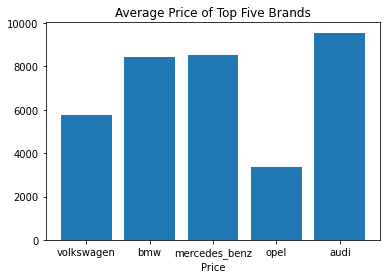

In [124]:
plt.bar(avg_price_brand.keys(),avg_price_brand.values())
plt.xlabel('Brands')
plt.xlabel('Price')
plt.title('Average Price of Top Five Brands')

<br>As we can observe from the bar graph above:
>**Audi** which is the *top 5* most frequent brand has the highest selling price while **Volkswagen** the **top 1** most frequent brand has the second the the highest selling price.

To have a better understanding for the selling points, we'll try to see the average selling price for the whole data set.

In [62]:
avg_price = (autos['price'].sum()/autos['price'].size).round(2)
print('Average price :',avg_price)

Average price : 6180.03


<br>According to the average price of our dataset, we can say that:
>**Volkswagen** and **Opel** prices are *lower* than the average price. While **BMW**, **Mercedes Benz** and **Audi** have an above average prices.

<br>We will further use the aggregated data to understand the average mileage for those cars and if there's any visible link with mean price. We're going to create a new *dataframe* based on the `top_five_brands` to compare it with the mileage. Since comparing two *series* will be more difficult to read and understand.

To create a new *dataframe*, first we identified that we want to compare the **mean price** and **average mileage** to see if there's a link. So we are going to extract these two data from our dataset and store it in a list of list.

In [128]:
avg_price_mileage = list()

for brand in top_five_brands:
    brand_mask = autos['brand'] == brand
    avg_mileage = np.round(autos.loc[brand_mask,'total_km'].sum() / autos.loc[brand_mask,'total_km'].size,2)
    avg_price = np.round(autos.loc[brand_mask,'price'].sum() / autos.loc[brand_mask,'price'].size,2)
    avg_price_mileage.append([brand,avg_price,avg_mileage])

print('Data to be stored in a new dataframe :')
avg_price_mileage

Data to be stored in a new dataframe :


[['volkswagen', 5738.59, 128424.37],
 ['bmw', 8440.65, 133087.94],
 ['mercedes_benz', 8523.28, 131371.58],
 ['opel', 3368.61, 128407.24],
 ['audi', 9550.4, 128943.07]]

<br>We are going to store the data above in a dataframe with a variable name `df`.

In [111]:
df = pd.DataFrame(avg_price_mileage,columns = ['brand','mean_price','mean_mileage']).set_index('brand')
df.index.name = None
df

,mean_price,mean_mileage
volkswagen,5738.59,128424.37
bmw,8440.65,133087.94
mercedes_benz,8523.28,131371.58
opel,3368.61,128407.24
audi,9550.40,128943.07


<br>As we can see, there is a little to no correlation with our `mean_price` and `mean_mileage`. Just to be sure, we'll take a quick look with a scatter plot of our original dataset to see the relationship between `price` and `total_km`.

Text(0.5, 1.0, 'Price per Mileage')

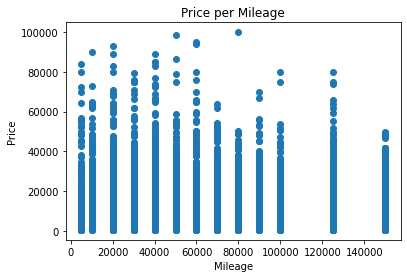

In [125]:
plt.scatter(autos['total_km'],autos['price'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Price per Mileage')

<br>From the graph we can conclude that mileage does not affect the price.

---

## Conclusion

The main focus of project is to have an in-depth walkthrough on our `data cleaning` phase. This dataset can be further cleaned based on the analyst's needs to derive a meaning on the dataset. But for now, this dataset is in a cleaned state compared to the original dataset we've loaded. 

The analyst might also change the conditions on selecting the threshold for the following:
- Price
- Total kilometer
- Date registered

A further cleaning can also be done to investigate on how to deal with the *null values*. For now, we are going to import our dataset so that another analyst or researcher can use it to do a deeper analysis of this dataset.

In [140]:
autos.to_csv('autos_pre_cleaned.csv',index=False)

Anyone can download this dataset from my github. Click this [link](https://github.com/reginaldrenz/dataquestproject/blob/main/autos_pre_cleaned.xls) to download the dataset.


<br>Sources: 
<br>[Used Cars Data](https://data.world/data-society/used-cars-data) - Dataset
<br>[Kaggle](https://www.kaggle.com/orgesleka/used-cars-database) *(No longer available)*
<br>[DataQuest](dataquest.io)
 - Reduced the dataset to 50,000 data points from the full dataset
 - Dirtied the dataset a bit to more closely resemble what would be expected from a scraped dataset (the version uploaded to [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database) was already cleaned to be easier to work with)